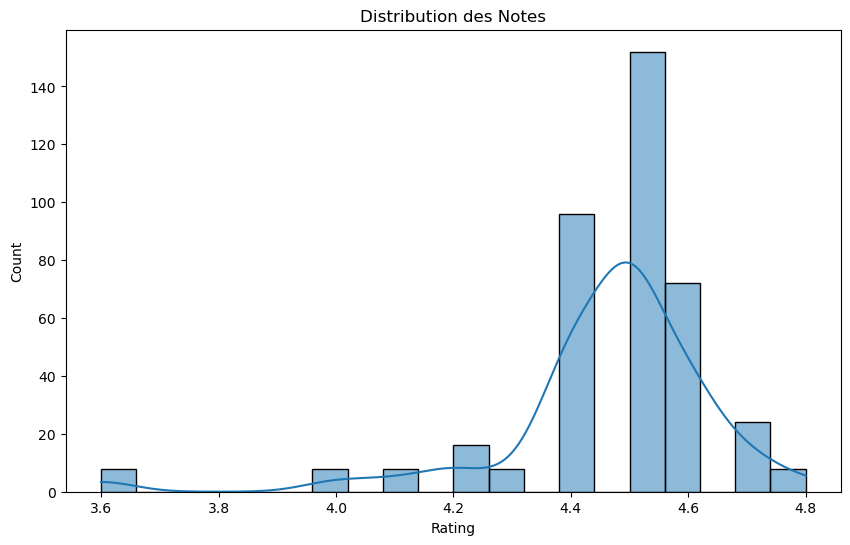

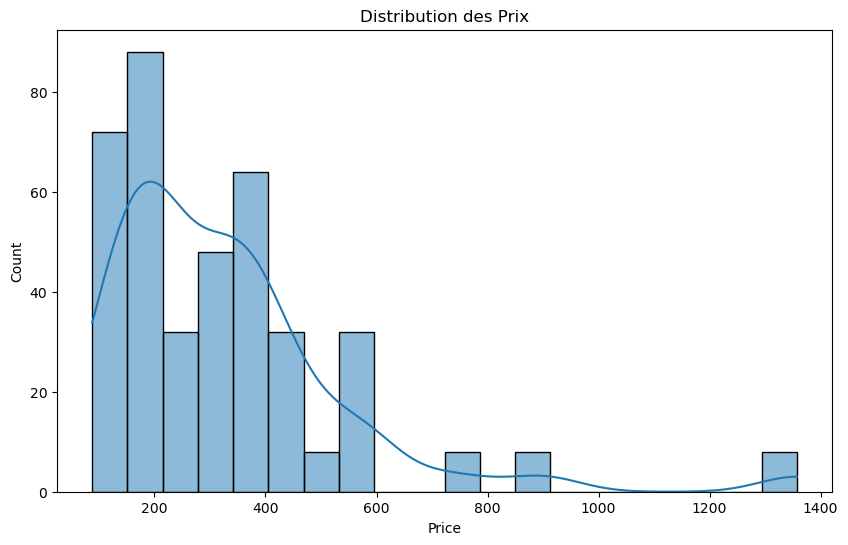

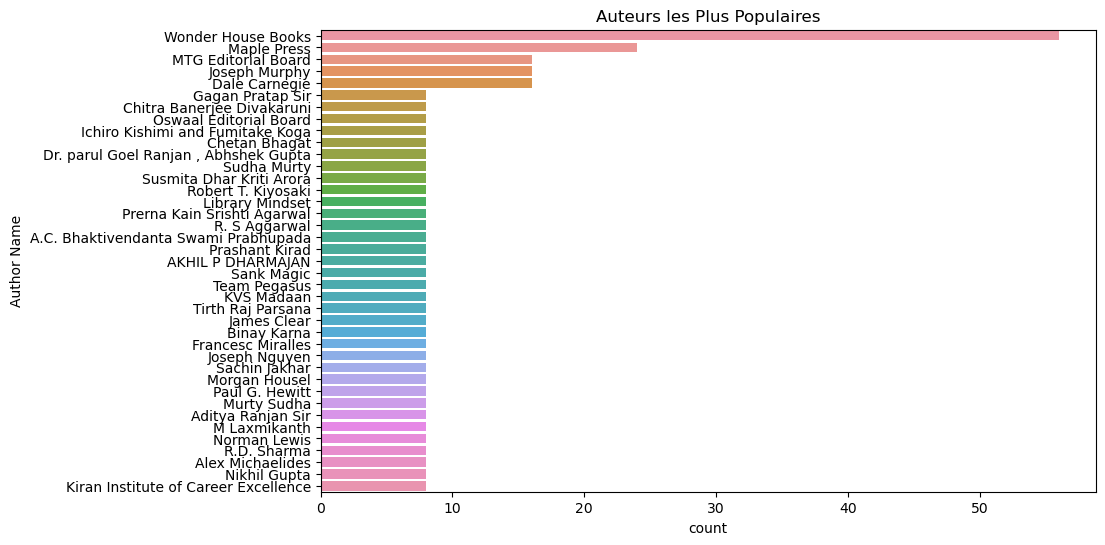

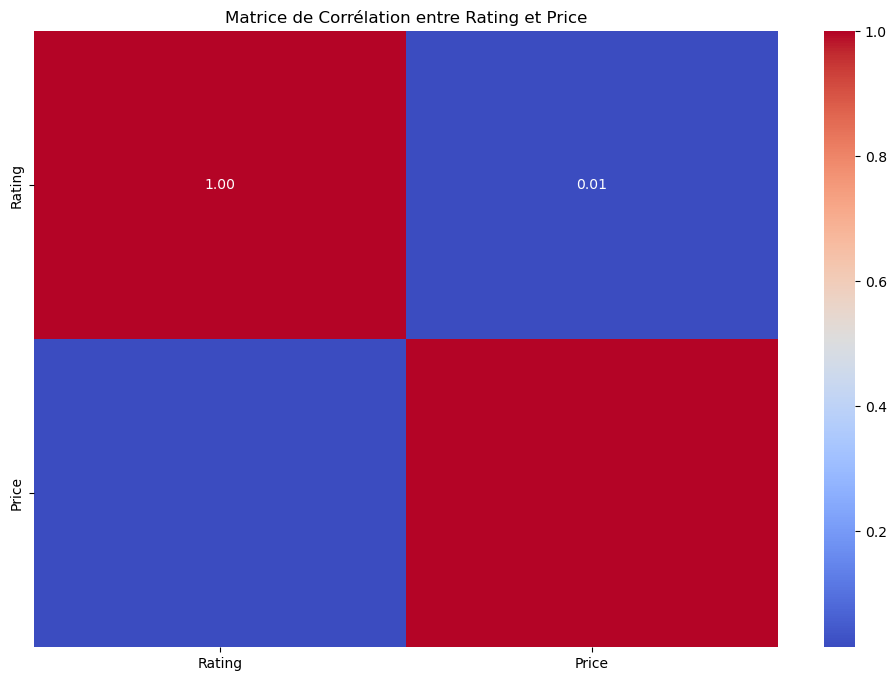

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorer les avertissements de type FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Charger les données
df = pd.read_csv('../data_raw/BestSeller_Books_of_Amazon.csv')

# Nettoyer les données de prix en supprimant les symboles de devise et en convertissant en float
df['Price'] = df['Price'].replace('[\₹,]', '', regex=True).astype(float)

# Remplacer les valeurs infinies par NaN (Not a Number)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Distribution des notes
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution des Notes')
plt.savefig('../reports/figures/Distribution_notes.png')
plt.show()

# Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution des Prix')
plt.savefig('../reports/figures/Distribution_prix.png')
plt.show()

# Auteurs les plus populaires
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Author Name'], order=df['Author Name'].value_counts().index)
plt.title('Auteurs les Plus Populaires')
plt.savefig('../reports/figures/Auteurs_populaires.png')
plt.show()

# Matrice de corrélation
numeric_df = df[['Rating', 'Price']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation entre Rating et Price')
plt.savefig('../reports/figures/Matrice_correlation.png')
plt.show()

